# Homework Assignment 2 
## Probability, Naive Bayes and Linear Regression 

### CSCI-P 556: APPLIED MACHINE LEARNING Spring 2021

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import collections 

In [64]:
message = pd.read_csv('/Users/VighneshKolhatkar/P556-coursefile/hw2/message.csv')
message

,Label,Message
0,0,go until jurong point crazy available only ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i don t think he goes to usf he lives aro...
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ü b going to esplanade fr home
5569,0,pity was in mood for that so any other s...
5570,0,the guy did some bitching but i acted like i d...


In [65]:
message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   int64 
 1   Message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [66]:
message['Label'].value_counts()

0    4825
1     747
Name: Label, dtype: int64

# Question 1 

### Develop a Naive Bayes spam detector to classify whether the message is spam or not.

*Using stratified K-fold cross validation K = 10 and an 80-20 split between training and testing data*

In [67]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2)
for train_index, test_index in split.split(message, message['Label']):
    strat_train_set = message.loc[train_index]
    strat_test_set = message.loc[test_index]
    

In [68]:
strat_train_set['Label'].value_counts()/len(strat_train_set)

0    0.865829
1    0.134171
Name: Label, dtype: float64

In [69]:
strat_test_set['Label'].value_counts()/len(strat_test_set)

0    0.866368
1    0.133632
Name: Label, dtype: float64

In [70]:
message['Label'].value_counts()/len(message)

0    0.865937
1    0.134063
Name: Label, dtype: float64

#### We can see there is same data split for all the train test and original Message data sets

In [71]:
strat_train_set.head()

,Label,Message
5533,0,hey chief can you give me a bell when you get...
3486,0,no i got rumour that you going to buy apartm...
845,0,k k when are you going
3237,0,aight text me when you re back at mu and i ll ...
3299,1,this message is free welcome to the new imp...


In [72]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 3982 to 2747
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    1115 non-null   int64 
 1   Message  1115 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.1+ KB


### 1Q) From the training set, compute the total number of unique words in the set and the count of each unique word in each message. 

### Hence, if there are N unique words and M messages in the training set, then the count of each unique word for all messages should result in a M × N matrix.

### You may want to use DataFrame and dictionary objects to accomplish this.You may also use split() to ignore whitespace.

In [73]:

vocabulary = []
for msg in strat_train_set['Message'].values.tolist():
    msg = msg.split(" ")
    for word in msg:
        vocabulary.append(word)
            
vocabulary = list(set(vocabulary))

print(len(vocabulary))




7798


In [74]:
word_counts_per_sms = {unique_word: [0] * len(strat_train_set['Message']) for unique_word in vocabulary}
for index, sms in enumerate(strat_train_set['Message'].str.split()):
    for word in sms:
        word_counts_per_sms[word][index] += 1

print(len(strat_train_set['Message']))

4457


In [75]:
word_counts = pd.DataFrame(word_counts_per_sms)
word_counts

,,dust,nannys,aaooooright,pussy,finest,waheeda,ijust,fire,words,...,laughed,bridal,website,stopbcm,transferred,bare,gravy,disconnected,450ppw,ctter
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
strat_train_set.reset_index(drop=True, inplace=True)
word_counts.reset_index(drop=True, inplace=True)
strat_train_set_clean = pd.concat([strat_train_set, word_counts], axis=1)
#len(strat_train_set)
strat_train_set_clean

,Label,Message,,dust,nannys,aaooooright,pussy,finest,waheeda,ijust,...,laughed,bridal,website,stopbcm,transferred,bare,gravy,disconnected,450ppw,ctter
0,0,hey chief can you give me a bell when you get...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,no i got rumour that you going to buy apartm...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,k k when are you going,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,aight text me when you re back at mu and i ll ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,this message is free welcome to the new imp...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,0,he s just gonna worry for nothing and he won ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4453,0,you please give us connection today itself bef...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4454,0,howz that persons story,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4455,0,juz now havent woke up so a bit blur blur c...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Isolating spam and nonspam messages first
spam_messages = strat_train_set_clean[strat_train_set_clean['Label'] == 1]
nonspam_messages = strat_train_set_clean[strat_train_set_clean['Label'] == 0]

# P(Spam) and P(NonSpam)
p_spam = len(spam_messages) / len(strat_train_set_clean)
p_nonspam = len(nonspam_messages) / len(strat_train_set_clean)

# N_Spam
n_words_per_spam_message = spam_messages['Message'].apply(len)
n_spam = n_words_per_spam_message.sum()

# N_Nonspam
n_words_per_nonspam_message = nonspam_messages['Message'].apply(len)
n_nonspam = n_words_per_nonspam_message.sum()

# N_Vocabulary
n_vocabulary = len(vocabulary)



### Without Laplace Smoothing


In [78]:
# Initiate parameters
parameters_spam1 = {unique_word:0 for unique_word in vocabulary}
parameters_nonspam1 = {unique_word:0 for unique_word in vocabulary}

# Calculate parameters
for word in vocabulary:
    n_word_given_spam = spam_messages[word].sum() # spam_messages already defined
    p_word_given_spam1 = (n_word_given_spam) / (n_spam + n_vocabulary)
    parameters_spam1[word] = p_word_given_spam1

    n_word_given_nonspam = nonspam_messages[word].sum() # nonspam_messages already defined
    p_word_given_nonspam1 = (n_word_given_nonspam) / (n_nonspam + n_vocabulary)
    parameters_nonspam1[word] = p_word_given_nonspam1

In [79]:
print("Probability of spam :", p_spam)
print("Probability of non spam :", p_nonspam)
print("Probability of word given spam :", p_word_given_spam1)
print("Probability of word given nonspam :", p_word_given_nonspam1)

Probability of spam : 0.13417096701817366
Probability of non spam : 0.8658290329818263
Probability of word given spam : 0.0
Probability of word given nonspam : 3.518648838845883e-06


In [83]:
def classify1(message1):
    message1 = message1.split()
    p_spam_given_message1 = p_spam
    p_nonspam_given_message1 = p_nonspam

    for word in message1:
        if word in parameters_spam1:
            p_spam_given_message1 *= parameters_spam1[word]

        if word in parameters_nonspam1: 
            p_nonspam_given_message1 *= parameters_nonspam1[word]

    if p_nonspam_given_message1 > p_spam_given_message1:
        return 0
    elif p_nonspam_given_message1 < p_spam_given_message1:
        return 1
    else:
        return np.nan

In [84]:
test_set_og = strat_test_set.copy(deep=True) 
test_set_og['predicted'] = test_set_og['Message'].apply(classify1)
test_set_og.head()

,Label,Message,predicted
3982,0,huh i cant thk of more oredi how many pages do...,0.0
2748,0,ya had just now onion roast,0.0
5052,0,with my sis lor we juz watched italian job,0.0
796,0,it s really getting me down just hanging around,0.0
2012,0,do whatever you want you know what the rules ...,0.0


In [85]:
## Accuracy, Precision, Recall and Confusion Matrix

TP1 = 0
TN1 = 0
FP1 = 0
FN1 = 0

for row in test_set_og.iterrows():
    row = row[1]
    
    if row['Label'] == 1 and row['predicted'] == 1:
        TP1 += 1
    
    elif row['Label'] == 0 and row['predicted'] == 0:
        TN1 += 1
        
    elif row['Label'] == 1 and row['predicted'] == 0:
        FN1 += 1
        
    elif row['Label'] == 0 and row['predicted'] == 1:
        FP1 += 1

total = TP1 + TN1 + FP1 + FN1

try:
    accuracy1 = (TP1 + TN1)/total
    precision1 = TP1/(TP1 + FP1) 
    recall1 = TP1/ (TP1 + FN1)
    specificity1 = TN1 / (TN1 + FP1)
    
    print("Accuracy without Laplace Smoothing: ", accuracy1)
    print("Precision without Laplace Smoothing: ", precision1)
    print("Recall without Laplace Smoothing: ", recall1)
    print("Specificity without Laplace Smoothing: ", specificity1)
    
except ZeroDivisionError:
    print("Values zero!!")



Accuracy without Laplace Smoothing:  0.9933269780743565
Precision without Laplace Smoothing:  0.9829059829059829
Recall without Laplace Smoothing:  0.9583333333333334
Specificity without Laplace Smoothing:  0.9978471474703983


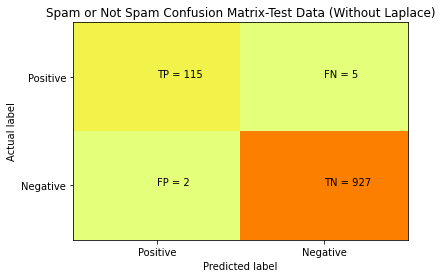

In [86]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm1 = [[TP1, FN1], [FP1, TN1]]
plt.clf()
plt.imshow(cm1, interpolation='nearest', cmap=plt.cm.Wistia, aspect='auto')
classNames = ['Positive', 'Negative']
plt.title('Spam or Not Spam Confusion Matrix-Test Data (Without Laplace)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TP', 'FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm1[i][j]))
plt.show()

### With Laplace Smoothing


In [87]:
# Initiate parameters
parameters_spam2 = {unique_word:0 for unique_word in vocabulary}
parameters_nonspam2 = {unique_word:0 for unique_word in vocabulary}

# Calculate parameters
for word in vocabulary:
    n_word_given_spam = spam_messages[word].sum() # spam_messages already defined
    p_word_given_spam2 = (n_word_given_spam + 1) / (n_spam + n_vocabulary)
    parameters_spam2[word] = p_word_given_spam2

    n_word_given_nonspam = nonspam_messages[word].sum() # nonspam_messages already defined
    p_word_given_nonspam2 = (n_word_given_nonspam + 1) / (n_nonspam + n_vocabulary)
    parameters_nonspam2[word] = p_word_given_nonspam2

In [88]:
print("Probability of spam :", p_spam)
print("Probability of non spam :", p_nonspam)
print("Probability of word given spam with Laplace Smoothing :", p_word_given_spam2)
print("Probability of word given nonspam with Laplace Smoothing :", p_word_given_nonspam2)


Probability of spam : 0.13417096701817366
Probability of non spam : 0.8658290329818263
Probability of word given spam with Laplace Smoothing : 1.1071867491889857e-05
Probability of word given nonspam with Laplace Smoothing : 7.037297677691766e-06


In [89]:
def classify2(message):
    message = message.split()
    p_spam_given_message2 = p_spam
    p_nonspam_given_message2 = p_nonspam

    for word in message:
        if word in parameters_spam2:
            p_spam_given_message2 *= parameters_spam2[word]

        if word in parameters_nonspam2: 
            p_nonspam_given_message2 *= parameters_nonspam2[word]

    if p_nonspam_given_message2 > p_spam_given_message2:
        return 0
    elif p_nonspam_given_message2 < p_spam_given_message2:
        return 1
    #else:
        #return np.nan
 

In [90]:
## Testing model on test set
test_set_laplace = strat_test_set.copy(deep=True) 
test_set_laplace['predicted'] = test_set_laplace['Message'].apply(classify2)
test_set_laplace.head()

,Label,Message,predicted
3982,0,huh i cant thk of more oredi how many pages do...,0.0
2748,0,ya had just now onion roast,0.0
5052,0,with my sis lor we juz watched italian job,0.0
796,0,it s really getting me down just hanging around,0.0
2012,0,do whatever you want you know what the rules ...,0.0


In [91]:
## Accuracy, Precision, Recall and Confusion Matrix

TP2 = 0
TN2 = 0
FP2 = 0
FN2 = 0

for row in test_set_laplace.iterrows():
    row = row[1]
    
    if row['Label'] == 1 and row['predicted'] == 1:
        TP2 += 1
    
    elif row['Label'] == 0 and row['predicted'] == 0:
        TN2 += 1
        
    elif row['Label'] == 1 and row['predicted'] == 0:
        FN2 += 1
        
    elif row['Label'] == 0 and row['predicted'] == 1:
        FP2 += 1

total2 = TP2 + TN2 + FP2 + FN2

accuracy2 = (TP2 + TN2)/total2
precision2 = TP2/(TP2 + FP2) 
recall2 = TP2/ (TP2 + FN2)
specificity2 = TN2 / (TN2 + FP2)

print("Accuracy with Laplace Smoothing: ", accuracy2)
print("Precision with Laplace Smoothing: ", precision2)
print("Recall with Laplace Smoothing: ", recall2)
print("Specificity with Laplace Smoothing: ", specificity2)

Accuracy with Laplace Smoothing:  0.9910152740341419
Precision with Laplace Smoothing:  0.9664429530201343
Recall with Laplace Smoothing:  0.9664429530201343
Specificity with Laplace Smoothing:  0.9948132780082988


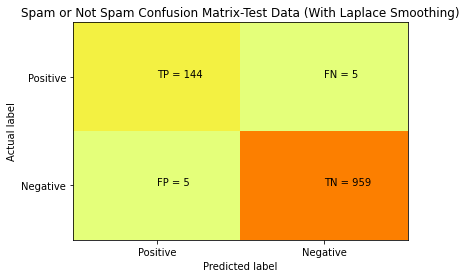

In [92]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm2 = [[TP2, FN2], [FP2, TN2]]
plt.clf()
plt.imshow(cm2, interpolation='nearest', cmap=plt.cm.Wistia, aspect='auto')
classNames = ['Positive', 'Negative']
plt.title('Spam or Not Spam Confusion Matrix-Test Data (With Laplace Smoothing)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TP', 'FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm2[i][j]))
plt.show()

## Description 

### The data is divided into k folds with 80-20 split.
### M x N matrix (DataFrame) is created for every unique word vs the messages. 
### The probabilities : P(spam), P(nonspam), P(word | spam), P(word | nonspam) are computed :
         Probability of spam : 0.13417096701817366
         Probability of non spam : 0.8658290329818263
         Probability of word given spam : 0.0
         Probability of word given nonspam : 3.518648838845883e-06
    
### Noticed that, without Laplace Smoothing, the P(word | nonspam) = 3.518648838845883e-06 and P(word | spam) = 0.

### Then Naive-Bayes Classifier is applied using the function created 'classify1()' 
#### Accuracy without Laplace Smoothing:  0.9933269780743565
#### Precision without Laplace Smoothing:  0.9829059829059829
#### Recall without Laplace Smoothing:  0.9583333333333334
#### Specificity without Laplace Smoothing:  0.9978471474703983


### The probabilities : P(spam), P(nonspam), P(word | spam), P(word | nonspam) are computed with Laplace smoothing :
        Probability of spam : 0.13417096701817366
        Probability of non spam : 0.8658290329818263
        Probability of word given spam with Laplace Smoothing : 1.1071867491889857e-05
        Probability of word given nonspam with Laplace Smoothing : 7.037297677691766e-06
        
### With Laplace Smoothing, the P(word | nonspam) = 7.037297677691766e-06 and P(word | spam) = 1.1071867491889857e-05
        
### Then Naive-Bayes Classifier is again applied using the function created 'classify2()'
#### Accuracy with Laplace Smoothing:  0.9910152740341419
#### Precision with Laplace Smoothing:  0.9664429530201343
#### Recall with Laplace Smoothing:  0.9664429530201343
#### Specificity with Laplace Smoothing:  0.9948132780082988




### Summarizing Naive-Bayes Classifier, it assumes class conditional independent probabilities, where we calculate 'likelihood' i.e.  P(word | spam) and P(word | nonspam)  and the prior probabilities i.e. P(spam) and P(nonspam). Then, we use the Naive-Bayesian equation to calculate the Posterior Probabilities i.e. P(spam | word) and P(nonspam | word). We compare both the values and if P(spam | word) > P(nonspam | word) we classify it as 'Spam' or Label 1 else if P(nonspam | word) > P(spam | word) we classify it as 'Nonspam' or Label 0


### Thus we observed that, the accuracy, recall changes with Laplace Smoothing giving different values for TP, TN, FP, FN. which affects the P(nonspam | word) and  P(spam | word) in classify1() function


